# Quellen
Um eine erste Datenbasis zu schaffen, werden Daten von MeteoSchweiz verwendet. Unter folgendem Link (https://www.meteoschweiz.admin.ch/product/input/climate-data/swissmean/10.18751-Climate-Timeseries-CHTM-1.1-swiss.txt) sind die Temperatur- und Niederschlags-Monatsmittelwerte für die Schweiz seit 1864 publiziert.

Weiter sind auf folgender Seite (https://www.meteoschweiz.admin.ch/home/klima/schweizer-klima-im-detail/klima-normwerte/normwerte-pro-messgroesse-und-station.html) Messwerte pro Station zu den Referenzperioden 1961-1990 und 1991-2010 zu den folgenden Messwerten vorhanden
- Temperatur
- Wind
- Feuchte
- Niederschlag
- Luftdruck
- Sonnenschein
- Bewölkung




In [8]:
### Temperatur und Niederschlag Mittelwerte Schweiz ab 1864
# Reading the file directly with read_csv generates a "403: Forbidden". Possible reason: Blocked on server side?
# Reading file with requests needs to be parsed as utf-8 since read_csv only reads from files

import pandas as pd
import requests
import io

response = requests.get('https://www.meteoschweiz.admin.ch/product/input/climate-data/swissmean/10.18751-Climate-Timeseries-CHTM-1.1-swiss.txt')

file_object = io.StringIO(response.content.decode('utf-8'))
data = pd.read_csv(file_object, sep='\t', skiprows=15)

print(data.head)


<bound method NDFrame.head of      time   jan   feb   mar   apr    may    jun    jul    aug    sep   oct  \
0    1864 -7.10 -4.52  0.04  2.11   7.43   9.48  12.37  10.95   8.59  3.50   
1    1865 -3.47 -6.25 -5.91  7.03  10.09  10.98  13.99  11.16  11.90  5.19   
2    1866 -1.31 -0.42 -1.00  4.11   4.95  12.02  12.25   9.98   9.70  5.34   
3    1867 -3.87  0.56 -0.13  3.49   7.74  10.57  11.29  12.93  10.43  2.92   
4    1868 -5.46 -1.53 -2.30  2.33  12.04  11.97  12.89  12.50  11.12  4.76   
..    ...   ...   ...   ...   ...    ...    ...    ...    ...    ...   ...   
152  2016 -1.10 -0.19  0.14  4.57   7.88  11.97  15.09  14.80  12.54  5.38   
153  2017 -5.15  0.46  4.11  4.42   9.80  15.18  15.05  15.45   8.65  7.78   
154  2018  0.48 -5.21 -0.21  7.81  10.43  13.81  16.24  15.89  12.56  8.04   
155  2019 -4.37  0.73  2.27  4.47   6.08  15.25  16.21  15.10  11.37  8.45   
156  2020 -0.28   NaN   NaN   NaN    NaN    NaN    NaN    NaN    NaN   NaN   

      nov   dec   djf   mam    jj

In [10]:
### Meteoschweiz Referenzwerte pro Messstation

# Sources: 
# https://www.dataquest.io/blog/web-scraping-tutorial-python/
# https://pythonspot.com/extract-links-from-webpage-beautifulsoup/

# Request: Download web content
# BS: Parse content
# re: Regex
import requests
from bs4 import BeautifulSoup
import re

links = []

page = requests.get("https://www.meteoschweiz.admin.ch/home/klima/schweizer-klima-im-detail/klima-normwerte/normwerte-pro-messgroesse-und-station.html")

# if page request is ok
if page.status_code == 200:
    site = BeautifulSoup(page.content, 'html.parser')
    for link in site.find_all('a', class_='icn-before norm-files'):
        links.append(link.get('href'))


lf = []
# Filter the list for .pdf Links
for l in links:
    if re.search('txt',l):
        lf.append(l)

# remove duplicates
lf = list(dict.fromkeys(lf))

# Download Data
response = requests.get('https://www.meteoschweiz.admin.ch'+lf[0])

file_object = io.StringIO(response.content.decode('windows 1252'))
data = pd.read_csv(file_object, sep='\t', skiprows=8)
print(data.head)


/product/input/climate-data/normwerte-pro-messgroesse/np6190/nvrep_np6190_tre200m0_d.pdf


Year  Month  Temperature  Precipitation
0  1864      1         -5.5           20.6
1  1864      2         -0.2           16.0
2  1864      3          6.0           48.4
3  1864      4          8.2           49.0
4  1864      5         13.1           53.2
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1874 entries, 0 to 1873
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Year           1874 non-null   int64  
 1   Month          1874 non-null   int64  
 2   Temperature    1874 non-null   float64
 3   Precipitation  1874 non-null   float64
dtypes: float64(2), int64(2)
memory usage: 58.7 KB
None


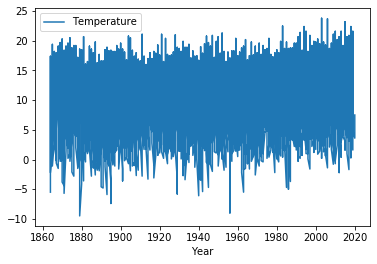

"\nhttp = urllib3.PoolManager()\nr = http.request('GET', 'https://www.meteoschweiz.admin.ch/product/output/climate-data/homogenous-monthly-data-processing/data/homog_mo_BAS.txt')\nr.data\n\n#data = response.read()\n#print(data)\n"

In [22]:
### Meteoschweiz Temperatur & Niederschlag pro Messstation seit 1864

import pandas as pd
import requests
import io
import urllib3
import matplotlib.pyplot as plt

response = requests.get('https://www.meteoschweiz.admin.ch/product/output/climate-data/homogenous-monthly-data-processing/data/homog_mo_BAS.txt')

file_object = io.StringIO(response.content.decode('windows 1252'))
data = pd.read_csv(file_object, delim_whitespace=True, skiprows=27) # parse_dates=[[0,1]] and na_values

print(data.head())
print(data.info())

data.plot(x='Year', y='Temperature')
plt.show()
'''
http = urllib3.PoolManager()
r = http.request('GET', 'https://www.meteoschweiz.admin.ch/product/output/climate-data/homogenous-monthly-data-processing/data/homog_mo_BAS.txt')
r.data

#data = response.read()
#print(data)
'''